# MONET2030 - Analysis

In [1]:
# Stdlib imports
import re
from pathlib import Path
from collections import namedtuple

# 3rd party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps as cm

# Local imports
from pymonet import monet_scraper as scraper
from pymonet import monet_processor as processor
from pymonet import monet_consts as const
from pymonet import monet_analysis as analysis
from pymonet import monet_aux as aux

## 1) Get Web Data

In [2]:
scraper_pipeline = scraper.MonetLoader()
raw_data = await scraper_pipeline.load()

Getting key indicators table...
Reading from disk...
-> done!
Getting indicator information...
Reading from disk...
-> done!
Getting observable information...
Reading from disk...
-> done!
Getting data files..
paths_exist: True
dirs_not_empty: True
Reading raw data from disk...
-> done!


## 2) Process/Transform Data

In [3]:
pipeline = processor.TransformationPipeline(raw_data,
                                            scraper_pipeline.indicators_metatable,
                                            scraper_pipeline.observables_metatable
                                           )
final_output = pipeline.run()

> Stage 1:
-> done!
> Stage 2:
-> done!
> Stage 3:
-> done!
> Stage 4:
-> done!
> Stage 5:
-> done!
> Stage 6:
-> done!
> Stage 7:
-> done!


In [4]:
results = pipeline.collect_results()

There results can be accessed via the following keys:
. raw
. clean
. interpolated
. residuals
. zscores
. metrics_metatable
. confidence_intervals
. irrelevant_metrics
. duplicated_rows
. constant_cols
. sparse_cols
. outside_years
. uncertainty_envelopes
. trends
. p_values
. optimal_stl


## 3) Visual inspection

In [5]:
#figsaxes = pipeline.create_inspection_plots(create='all', write=True)

## 4) Analysis

### 4.1) Setup & Preparations

In [6]:
#analyzer = analysis.MonetAnalyzer(results)

### 4.2) Data Availability & Coverage Analysis

#### 4.2.1) Analysis of capitals

Question: How many metrics per capital are there?

File ../results/data_availability_analysis/n_metrics_per_capital.csv already exists... not overwriting!


,before cleaning,after cleaning
capital - primary,,
Economic,24,17
Human,69,47
Natural,51,34
Social,39,17


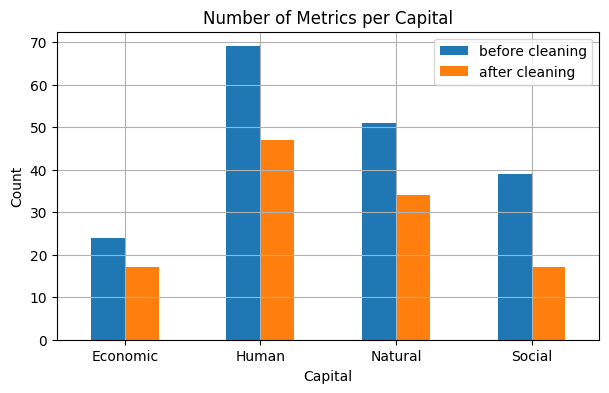

In [7]:
n_metrics_per_capital = analysis.nMetricsPerCapital(results["clean"])
npc = n_metrics_per_capital.analyze()

#### 4.2.2) Analysis of sparse data

Question: How many metrics per capital are too sparse (i.e. have less than 10 data points)

File ../results/data_availability_analysis/sparse_metrics.csv already exists... not overwriting!


,count
capital - primary,
Human,15
Social,14
Natural,12
Economic,2


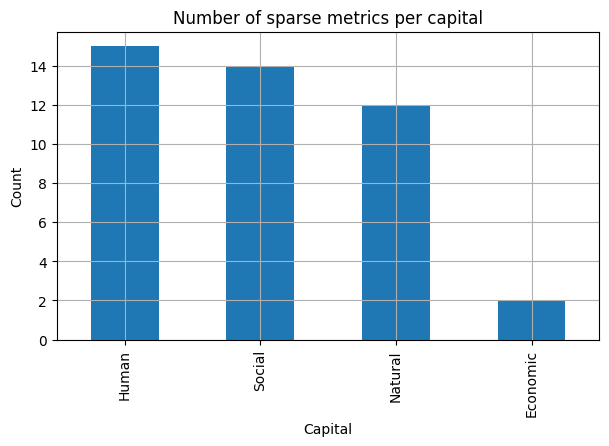

In [8]:
n_sparse_per_capital = analysis.nSparseMetricsPerCapital(results["sparse_cols"])
nspc = n_sparse_per_capital.analyze()

#### 4.2.3) Analysis of irrelevant data

Question: How many metrics per capital are irrelevant to agenda2030?

File ../results/data_availability_analysis/irrelevant_metrics.csv already exists... not overwriting!


,count
capital - primary,
Social,8
Human,7
Economic,5
Natural,5


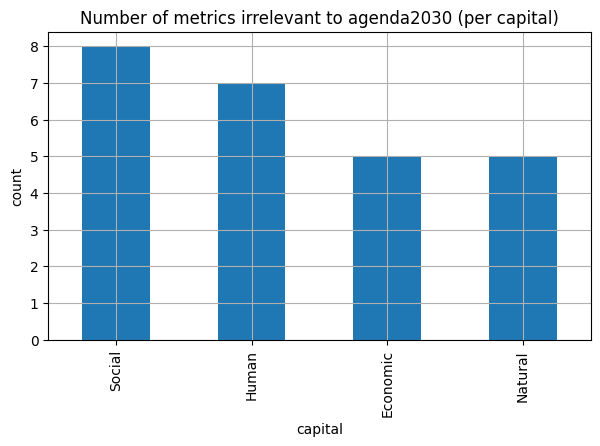

In [9]:
n_irrev_per_capital = analysis.nIrrelevantMetricsPerCapital(results["irrelevant_metrics"])
nipc = n_irrev_per_capital.analyze()

### 4.3) Analysis of raw data availability

Goal: Visually represent how many data points are available for each metric. Add additional information such as when that data is available and what capital the metric belongs to. 

File ../results/data_availability_analysis/n_datapoints_per_metric.csv already exists... not overwriting!
File ../results/data_availability_analysis/data_availability_map.csv already exists... not overwriting!


/usr/local/lib/python3.13/site-packages/pymonet/monet_analysis.py:559: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Figure ../results/data_availability_analysis/data_availability_all.pdf already exists... not overwriting!


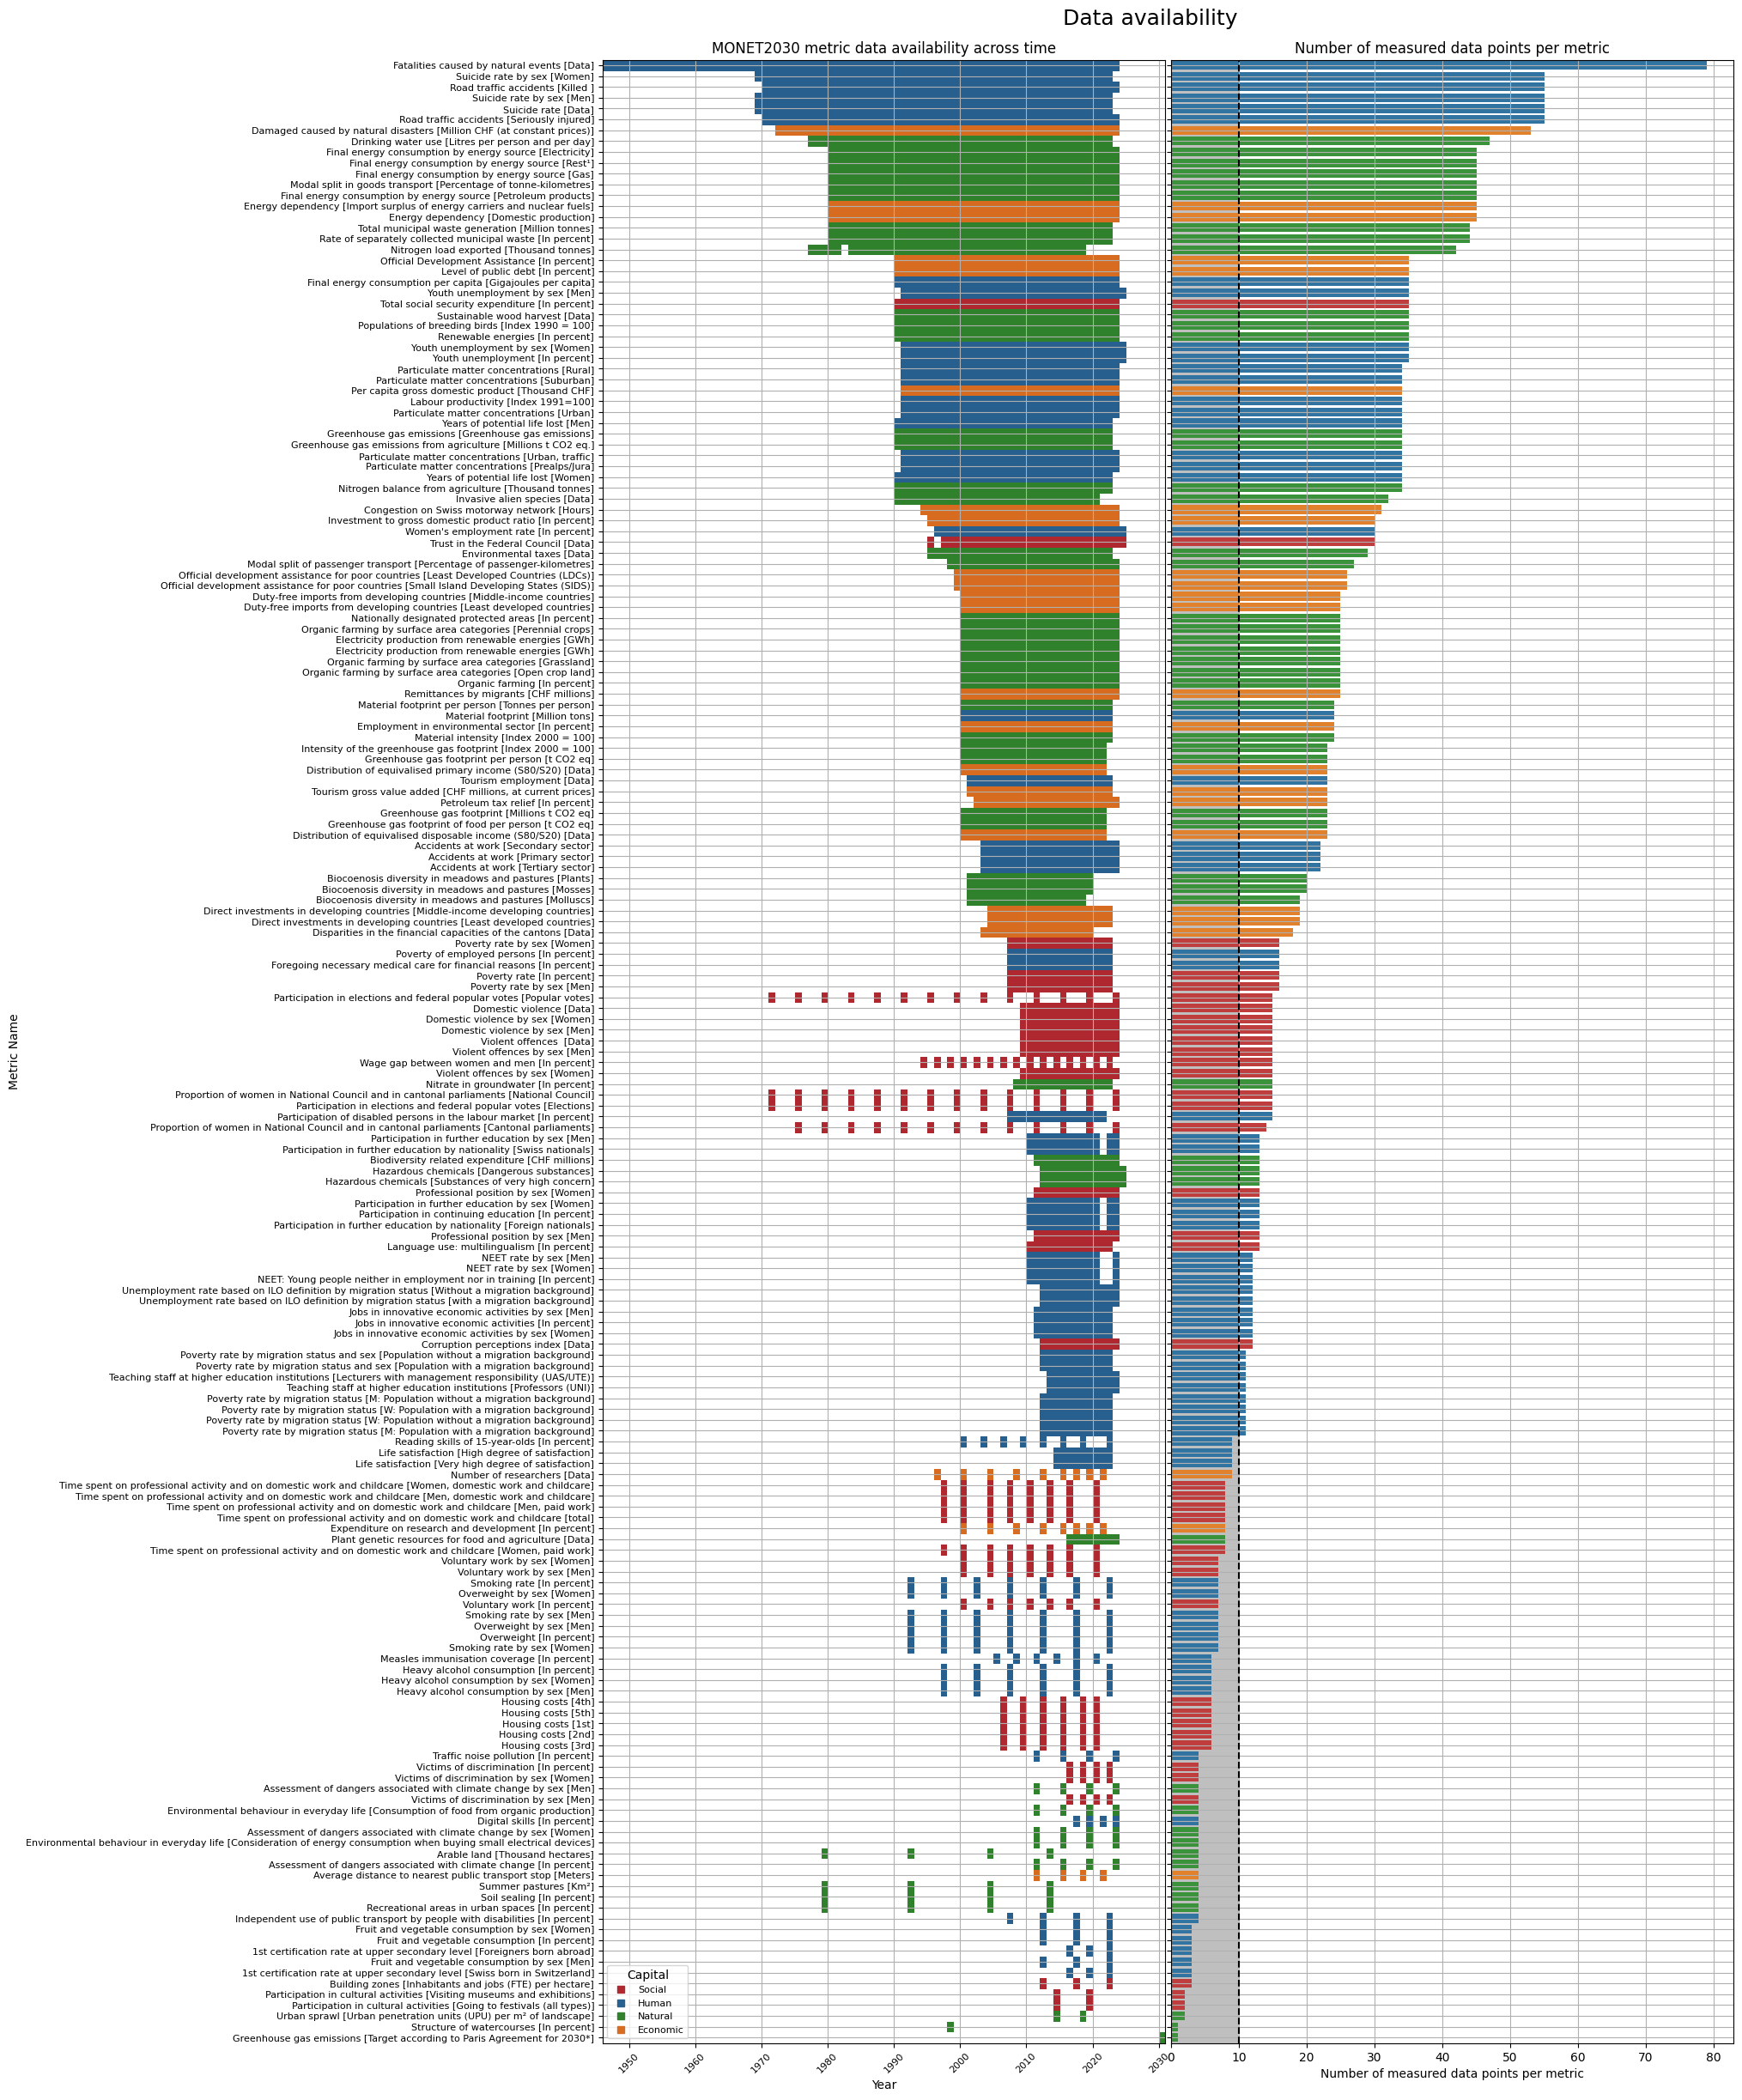

In [10]:
raw_data_availability = analysis.RawDataAvailability(results["raw"])
rda = raw_data_availability.analyze()

### 4.4) Correlation Analysis

Question: Which metrics are redundant?

File ../results/correlation_analysis/corrmat_all_lag0.csv already exists... not overwriting!
File ../results/correlation_analysis/n_to_keep_vs_corr_threshold_lag0.csv already exists... not overwriting!
File ../results/correlation_analysis/metrics_to_keep_lag0.xlsx already exists... not overwriting!
File ../results/correlation_analysis/correlation_groups_lag0 / corr_group_th0p8.xlsx already exists... not overwriting!
File ../results/correlation_analysis/correlation_groups_lag0 / corr_group_th0p82.xlsx already exists... not overwriting!
File ../results/correlation_analysis/correlation_groups_lag0 / corr_group_th0p84.xlsx already exists... not overwriting!
File ../results/correlation_analysis/correlation_groups_lag0 / corr_group_th0p86.xlsx already exists... not overwriting!
File ../results/correlation_analysis/correlation_groups_lag0 / corr_group_th0p88.xlsx already exists... not overwriting!
File ../results/correlation_analysis/correlation_groups_lag0 / corr_group_th0p9.xlsx already exi

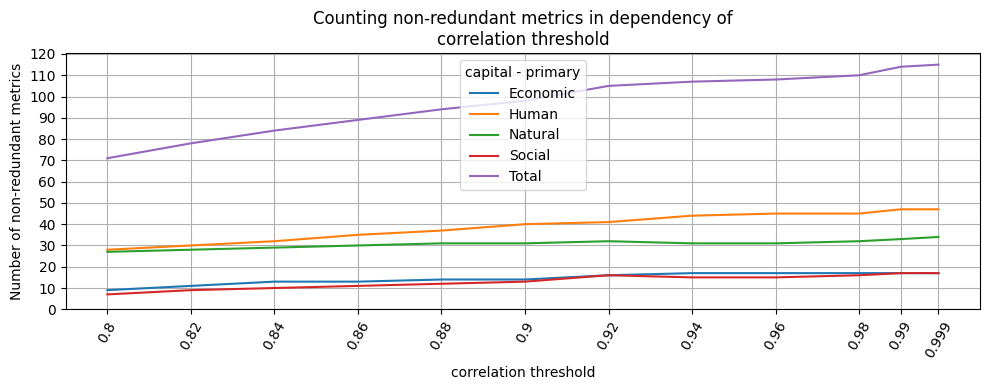

Figure ../results/correlation_analysis/corr_val_distribution_lag0.png already exists... not overwriting!


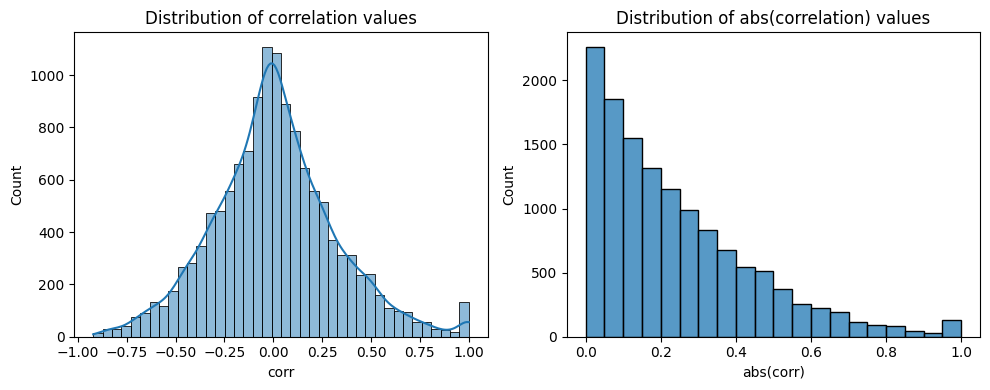

In [11]:
corr_zero_lag = analysis.CorrleationAnalysis(final_output, lag=0)
corr_0 = corr_zero_lag.analyze()

File ../results/correlation_analysis/corrmat_all_aggregated.csv already exists... not overwriting!
File ../results/correlation_analysis/n_to_keep_vs_corr_threshold_aggregated.csv already exists... not overwriting!
File ../results/correlation_analysis/metrics_to_keep_aggregated.xlsx already exists... not overwriting!
File ../results/correlation_analysis/correlation_groups_aggregated / corr_group_th0p8.xlsx already exists... not overwriting!
File ../results/correlation_analysis/correlation_groups_aggregated / corr_group_th0p82.xlsx already exists... not overwriting!
File ../results/correlation_analysis/correlation_groups_aggregated / corr_group_th0p84.xlsx already exists... not overwriting!
File ../results/correlation_analysis/correlation_groups_aggregated / corr_group_th0p86.xlsx already exists... not overwriting!
File ../results/correlation_analysis/correlation_groups_aggregated / corr_group_th0p88.xlsx already exists... not overwriting!
File ../results/correlation_analysis/correlation

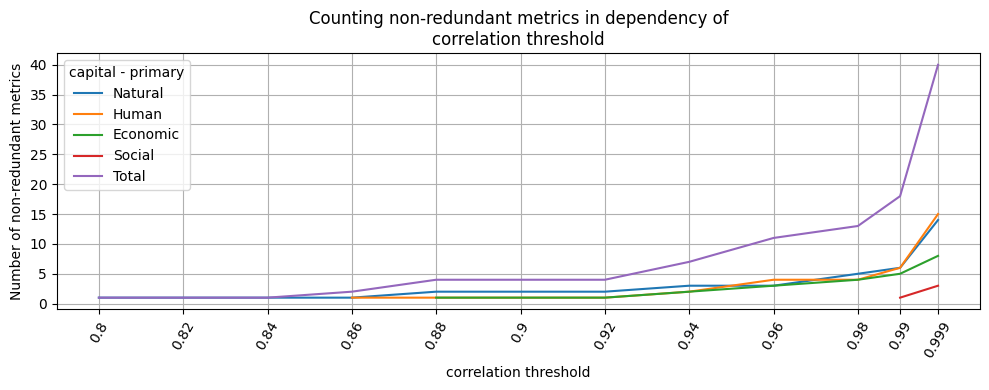

Figure ../results/correlation_analysis/corr_val_distribution_aggregated.png already exists... not overwriting!


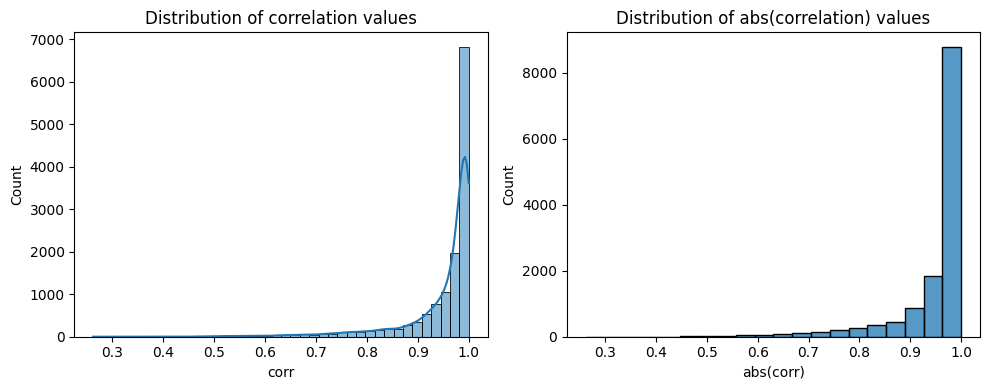

In [12]:
corr_agg = analysis.CorrleationAnalysis(final_output, lag=-1)
corr_all = corr_agg.analyze()

### 4.5) Trend & Performance Analysis

#### 4.5.1) Analysis of trend statistics per capital
Question: How well do the individual capitals do in terms of evolving in the right direction?

In [13]:
ta = analysis.PerformanceRanker(results["raw"])

File ../results/performance_analysis/performance_ranking.csv already exists... not overwriting!
File ../results/performance_analysis/slope_norm_stats.csv already exists... not overwriting!
File ../results/performance_analysis/top_performers.xlsx already exists... not overwriting!
File ../results/performance_analysis/worst_performers.xlsx already exists... not overwriting!


,metric_name,observable,description,dam_id,desired_trend,slope,slope_norm,capital - primary,is_key
metric_id,,,,,,,,,
33188686a_metr,Electricity production from renewable energies...,Electricity production from renewable energies,Electricity production from new renewable ener...,33188686,up,0.271409,0.271409,Natural,False
33188593b_metr,Organic farming by surface area categories [Pe...,Organic farming by surface area categories,Percentage of the organically farmed area in t...,33188593,up,0.183518,0.183518,Natural,False
33188593c_metr,Organic farming by surface area categories [Op...,Organic farming by surface area categories,Percentage of the organically farmed area in t...,33188593,up,0.167602,0.167602,Natural,False
29946686b_metr,Proportion of women in National Council and in...,Proportion of women in National Council and in...,Proportion of women in total of elected member...,29946686,up,0.13591,0.13591,Social,False
33188850b_metr,Hazardous chemicals [Substances of very high c...,Hazardous chemicals,Number of substances listed in the Chemicals O...,33188850,up,0.126832,0.126832,Natural,False
...,...,...,...,...,...,...,...,...,...
33188792d_metr,Poverty rate by migration status [W: Populatio...,Poverty rate by migration status,Poverty rate of the permanent resident populat...,33188792,down,0.028089,-0.028089,Human,False
33188792a_metr,Poverty rate by migration status [M: Populatio...,Poverty rate by migration status,Poverty rate of the permanent resident populat...,33188792,down,0.028762,-0.028762,Human,False
33188795b_metr,Poverty rate by migration status and sex [Popu...,Poverty rate by migration status and sex,Poverty rate of the permanent resident populat...,33188795,down,0.030594,-0.030594,Human,False


Figure ../results/performance_analysis/slope_norm_distribution.png already exists... not overwriting!


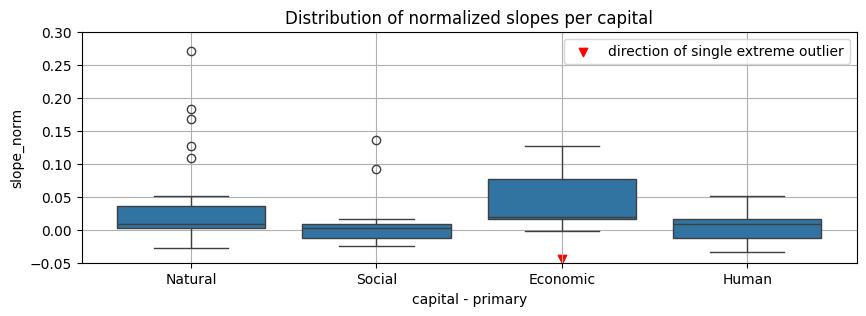

Figure ../results/performance_analysis/performance_ranking_plot.png already exists... not overwriting!


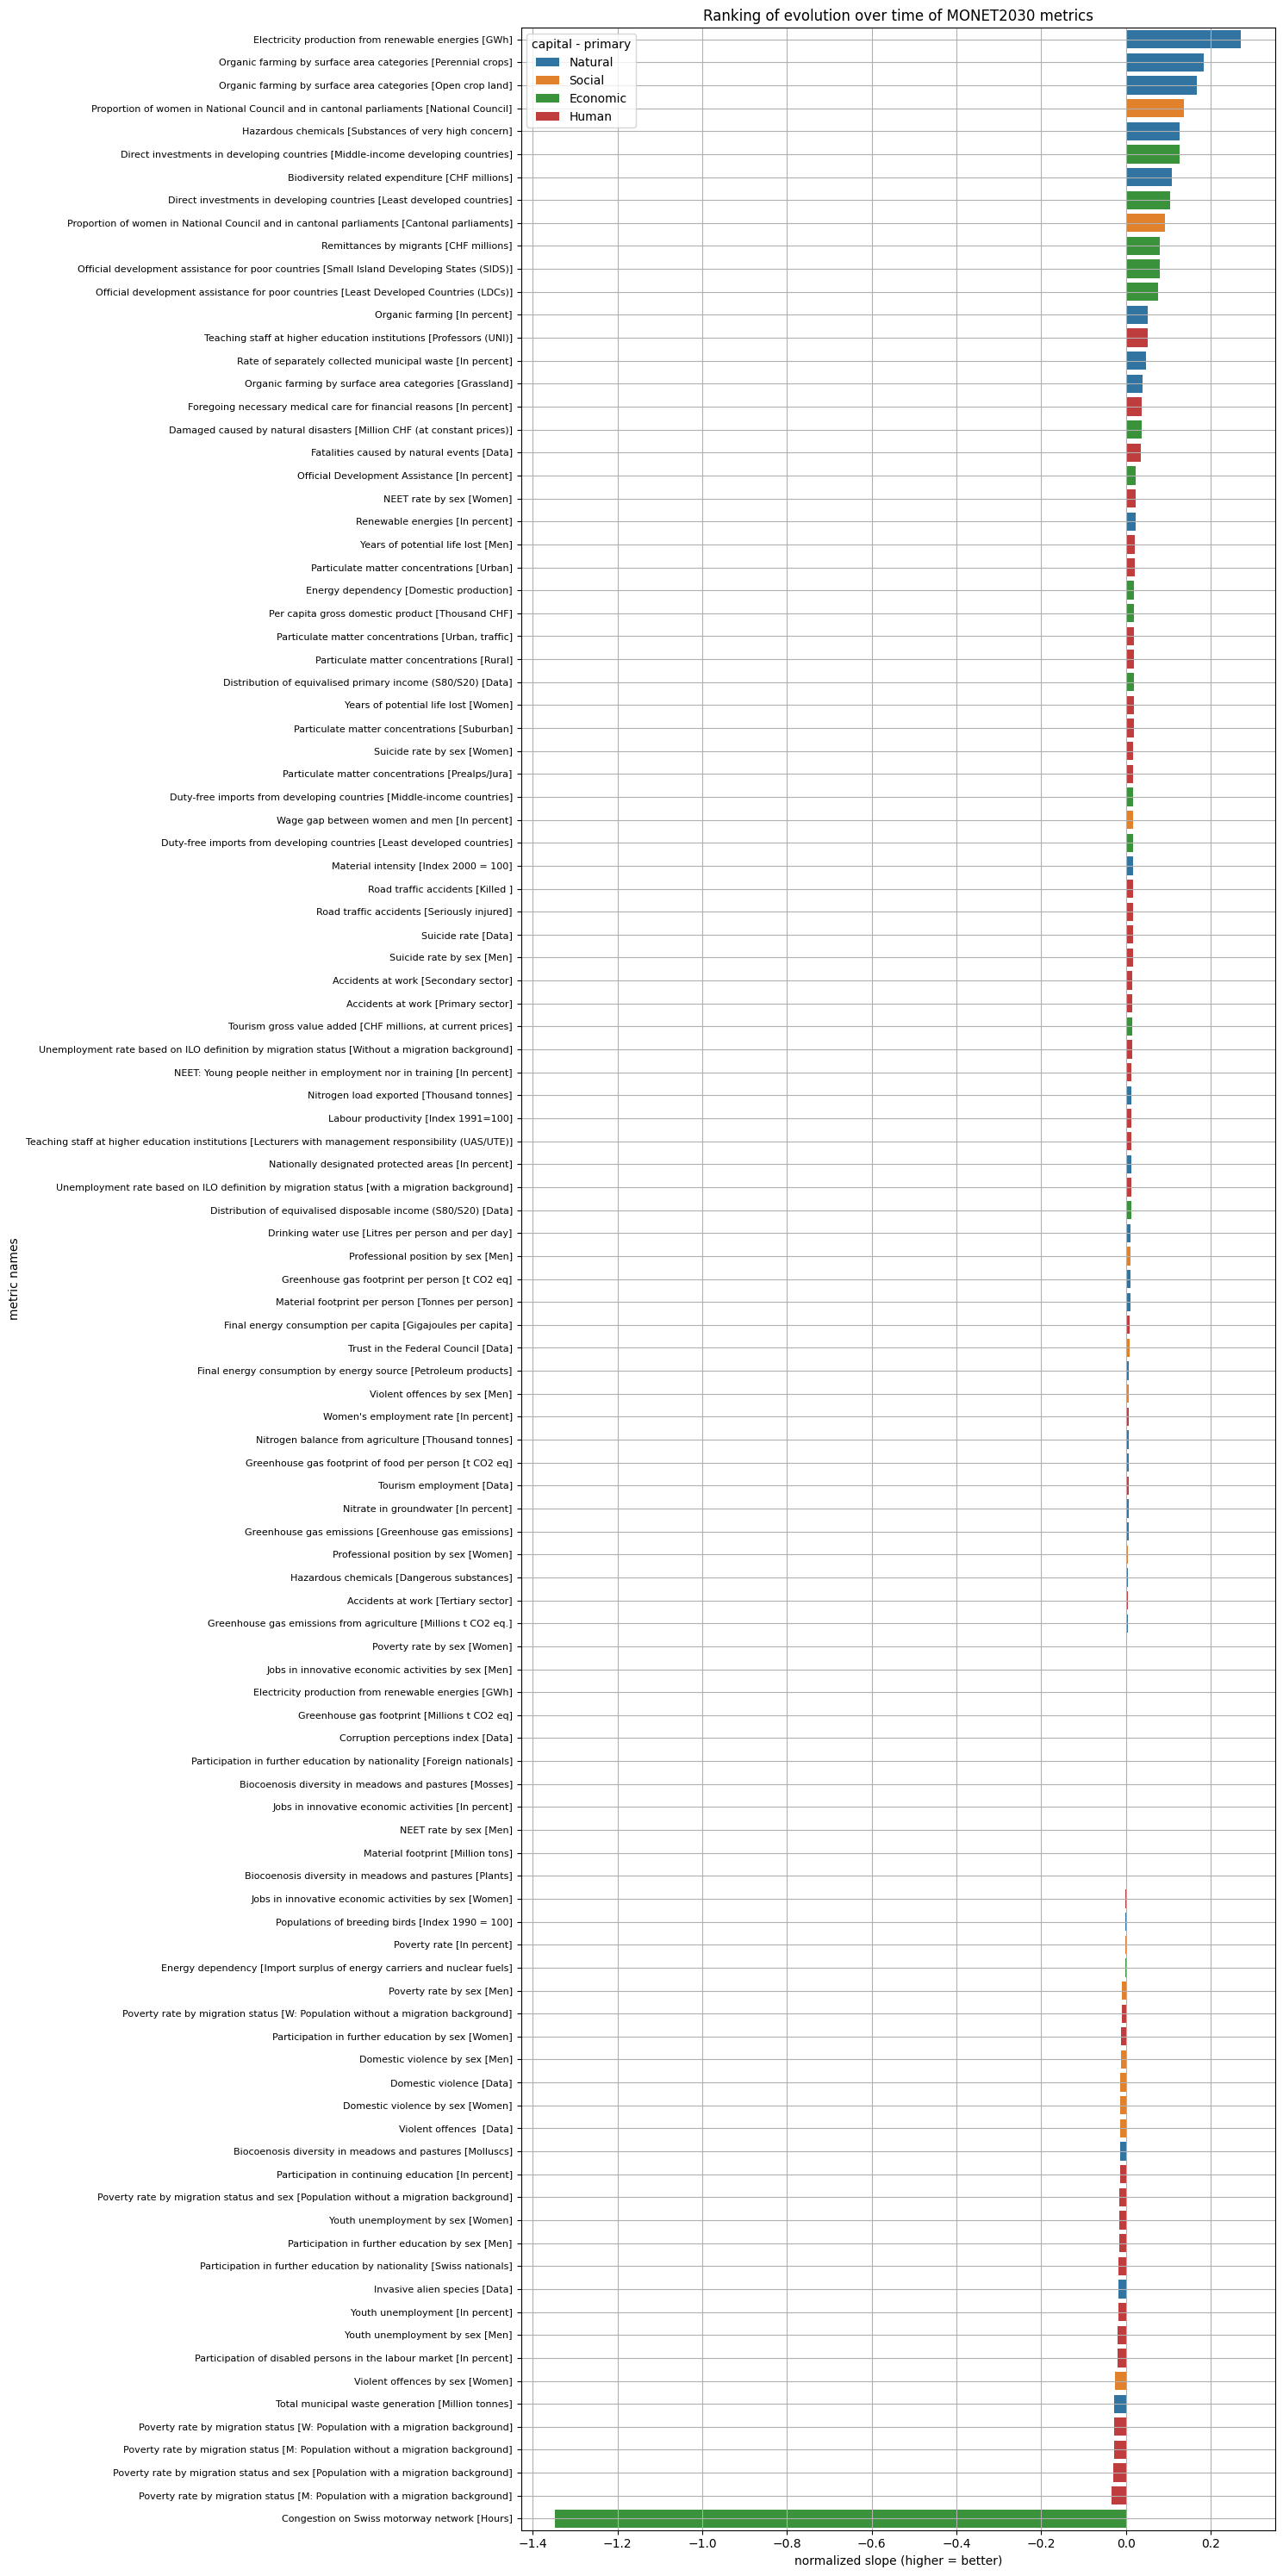

In [14]:
ranking, best, worst, slope_stats = ta.analyze()

#### 4.5.2) Best & Worst Performering Metrics
##### 4.5.2.a) Best & Worst Performering Metrics over all
Question: Which are the 3 best and worst performing metrics over all capitals?

In [15]:
top3 = ta.get_top3(ranking)
top3["overall"]

,metric_name,observable,description,dam_id,desired_trend,slope,slope_norm,capital - primary,is_key
metric_id,,,,,,,,,
33188686a_metr,Electricity production from renewable energies...,Electricity production from renewable energies,Electricity production from new renewable ener...,33188686,up,0.271409,0.271409,Natural,False
33188593b_metr,Organic farming by surface area categories [Pe...,Organic farming by surface area categories,Percentage of the organically farmed area in t...,33188593,up,0.183518,0.183518,Natural,False
33188593c_metr,Organic farming by surface area categories [Op...,Organic farming by surface area categories,Percentage of the organically farmed area in t...,33188593,up,0.167602,0.167602,Natural,False


In [16]:
bottom3 = ta.get_bottom3(ranking)
bottom3["overall"]

,metric_name,observable,description,dam_id,desired_trend,slope,slope_norm,capital - primary,is_key
metric_id,,,,,,,,,
33188795b_metr,Poverty rate by migration status and sex [Popu...,Poverty rate by migration status and sex,Poverty rate of the permanent resident populat...,33188795,down,0.030594,-0.030594,Human,False
33188792c_metr,Poverty rate by migration status [M: Populatio...,Poverty rate by migration status,Poverty rate of the permanent resident populat...,33188792,down,0.033421,-0.033421,Human,False
33188763a_metr,Congestion on Swiss motorway network [Hours],Congestion on Swiss motorway network,Congestion caused by excess traffic,33188763,down,1.346975,-1.346975,Economic,False


##### 4.5.2.a) Best & Worst Performering Metrics per capital
Question: Which are the 3 best and worst performing metrics within each capital?

In [17]:
aux.pretty_print({cap: top3[cap] for cap in ta.capitallist})

Natural:
--------


,metric_name,observable,description,dam_id,desired_trend,slope,slope_norm,capital - primary,is_key
metric_id,,,,,,,,,
33188686a_metr,Electricity production from renewable energies...,Electricity production from renewable energies,Electricity production from new renewable ener...,33188686,up,0.271409,0.271409,Natural,False
33188593b_metr,Organic farming by surface area categories [Pe...,Organic farming by surface area categories,Percentage of the organically farmed area in t...,33188593,up,0.183518,0.183518,Natural,False
33188593c_metr,Organic farming by surface area categories [Op...,Organic farming by surface area categories,Percentage of the organically farmed area in t...,33188593,up,0.167602,0.167602,Natural,False



Social:
-------


,metric_name,observable,description,dam_id,desired_trend,slope,slope_norm,capital - primary,is_key
metric_id,,,,,,,,,
29946686b_metr,Proportion of women in National Council and in...,Proportion of women in National Council and in...,Proportion of women in total of elected member...,29946686,up,0.13591,0.13591,Social,False
29946686a_metr,Proportion of women in National Council and in...,Proportion of women in National Council and in...,Proportion of women in total of elected member...,29946686,up,0.092509,0.092509,Social,False
33188945a_metr,Wage gap between women and men [In percent],Wage gap between women and men,Wage gap¹ between women and men as a percentag...,33188945,down,-0.016714,0.016714,Social,True



Economic:
---------


,metric_name,observable,description,dam_id,desired_trend,slope,slope_norm,capital - primary,is_key
metric_id,,,,,,,,,
33188938a_metr,Direct investments in developing countries [Mi...,Direct investments in developing countries,"Switzerland's capital exports, by countries in...",33188938,up,0.126619,0.126619,Economic,False
33188938b_metr,Direct investments in developing countries [Le...,Direct investments in developing countries,"Switzerland's capital exports, by countries in...",33188938,up,0.104329,0.104329,Economic,False
33188818a_metr,Remittances by migrants [CHF millions],Remittances by migrants,Total of remittances from migrant workers in S...,33188818,up,0.079658,0.079658,Economic,False



Human:
------


,metric_name,observable,description,dam_id,desired_trend,slope,slope_norm,capital - primary,is_key
metric_id,,,,,,,,,
33188627a_metr,Teaching staff at higher education institution...,Teaching staff at higher education institutions,Professors and lecturers with management respo...,33188627,up,0.050876,0.050876,Human,False
33188617a_metr,Foregoing necessary medical care for financial...,Foregoing necessary medical care for financial...,Percentage of the population at risk of povert...,33188617,down,-0.037266,0.037266,Human,False
33188574a_metr,Fatalities caused by natural events [Data],Fatalities caused by natural events,"Floods, debris flows, landslides, rockfall, ro...",33188574,down,-0.036089,0.036089,Human,False


In [18]:
aux.pretty_print({cap: bottom3[cap] for cap in ta.capitallist})

Natural:
--------


,metric_name,observable,description,dam_id,desired_trend,slope,slope_norm,capital - primary,is_key
metric_id,,,,,,,,,
33188899c_metr,Biocoenosis diversity in meadows and pastures ...,Biocoenosis diversity in meadows and pastures,Index¹ of 0 (uniform biocoenosis) to 100 (dive...,33188899,up,-0.014214,-0.014214,Natural,False
23567403a_metr,Invasive alien species [Data],Invasive alien species,Number of invasive alien species known,23567403,down,0.017771,-0.017771,Natural,False
33188856a_metr,Total municipal waste generation [Million tonnes],Total municipal waste generation,Incl. recycling,33188856,down,0.028028,-0.028028,Natural,True



Social:
-------


,metric_name,observable,description,dam_id,desired_trend,slope,slope_norm,capital - primary,is_key
metric_id,,,,,,,,,
33188653a_metr,Domestic violence by sex [Women],Domestic violence by sex,Number of victims of serious physical domestic...,33188653,down,0.013504,-0.013504,Social,True
33188910a_metr,Violent offences [Data],Violent offences,Number of victims for completed serious violen...,33188910,down,0.014155,-0.014155,Social,True
33188914a_metr,Violent offences by sex [Women],Violent offences by sex,Number of victims for completed serious violen...,33188914,down,0.025126,-0.025126,Social,True



Economic:
---------


,metric_name,observable,description,dam_id,desired_trend,slope,slope_norm,capital - primary,is_key
metric_id,,,,,,,,,
33188784a_metr,Distribution of equivalised disposable income ...,Distribution of equivalised disposable income ...,People living in working households,33188784,up,0.012205,0.012205,Economic,True
33188670b_metr,Energy dependency [Import surplus of energy ca...,Energy dependency,Domestic energy production from primary energy...,33188670,down,0.002261,-0.002261,Economic,False
33188763a_metr,Congestion on Swiss motorway network [Hours],Congestion on Swiss motorway network,Congestion caused by excess traffic,33188763,down,1.346975,-1.346975,Economic,False



Human:
------


,metric_name,observable,description,dam_id,desired_trend,slope,slope_norm,capital - primary,is_key
metric_id,,,,,,,,,
33188792a_metr,Poverty rate by migration status [M: Populatio...,Poverty rate by migration status,Poverty rate of the permanent resident populat...,33188792,down,0.028762,-0.028762,Human,False
33188795b_metr,Poverty rate by migration status and sex [Popu...,Poverty rate by migration status and sex,Poverty rate of the permanent resident populat...,33188795,down,0.030594,-0.030594,Human,False
33188792c_metr,Poverty rate by migration status [M: Populatio...,Poverty rate by migration status,Poverty rate of the permanent resident populat...,33188792,down,0.033421,-0.033421,Human,False


#### 4.5.3) Best & Worst Performing Key Indicators 
Question: What is the ranking of only the key indicators with respect to their evolution over time?

File ../results/performance_analysis/key_indicators_performance_ranking.csv already exists... not overwriting!
File ../results/performance_analysis/key_indicators_slope_norm_stats.csv already exists... not overwriting!
File ../results/performance_analysis/key_indicators_top_performers.xlsx already exists... not overwriting!
File ../results/performance_analysis/key_indicators_worst_performers.xlsx already exists... not overwriting!


,metric_name,observable,description,dam_id,desired_trend,slope,slope_norm,capital - primary,is_key
metric_id,,,,,,,,,
33707243a_metr,Official Development Assistance [In percent],Official Development Assistance,In proportion to gross national income (GNI),33707243,up,0.023561,0.023561,Economic,True
33188969b_metr,NEET rate by sex [Women],NEET rate by sex,Percentage of not employed young people aged 1...,33188969,down,-0.022927,0.022927,Human,True
33188698a_metr,Renewable energies [In percent],Renewable energies,In relation to final energy consumption,33188698,up,0.021938,0.021938,Natural,True
33188602b_metr,Years of potential life lost [Men],Years of potential life lost,Standardised rate by age for 100 000 populatio...,33188602,down,-0.020628,0.020628,Human,True
33188602a_metr,Years of potential life lost [Women],Years of potential life lost,Standardised rate by age for 100 000 populatio...,33188602,down,-0.01801,0.01801,Human,True
33188804a_metr,Duty-free imports from developing countries [M...,Duty-free imports from developing countries,Share of duty-free imports in the total value ...,33188804,up,0.017172,0.017172,Economic,True
33188945a_metr,Wage gap between women and men [In percent],Wage gap between women and men,Wage gap¹ between women and men as a percentag...,33188945,down,-0.016714,0.016714,Social,True
33188804b_metr,Duty-free imports from developing countries [L...,Duty-free imports from developing countries,Share of duty-free imports in the total value ...,33188804,up,0.016671,0.016671,Economic,True
33188757a_metr,Material intensity [Index 2000 = 100],Material intensity,Raw material consumption (RMC) to Gross Domest...,33188757,down,-0.016453,0.016453,Natural,True


Writing file ../results/performance_analysis/key_indicators_slope_norm_distribution.png...
-> Done!


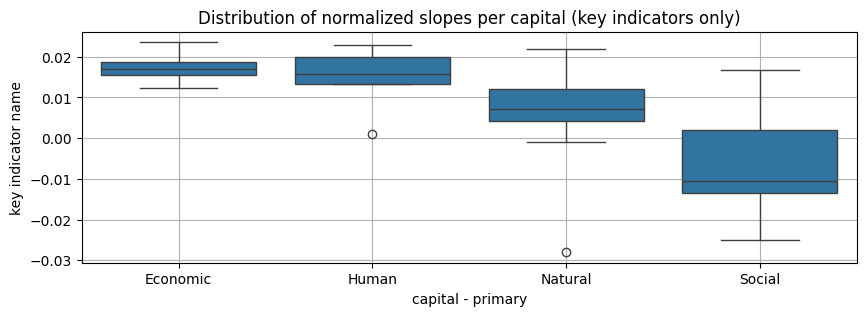

Writing file ../results/performance_analysis/key_indicators_performance_ranking_plot.png...
-> Done!


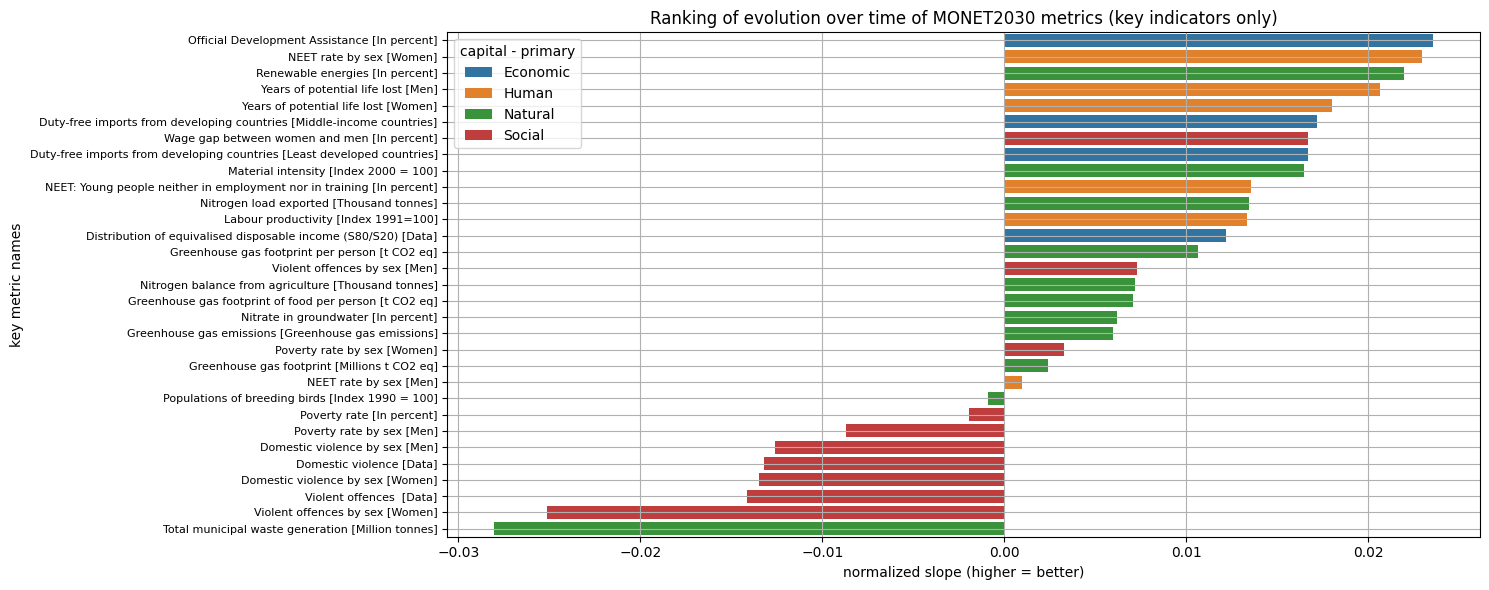

In [19]:
ta_key = analysis.PerformanceRanker(results["raw"], key_indicators_only=True)
key_ranking, key_best, key_worst, key_slope_stats = ta_key.analyze()

Question: How many key indicators are there among the groups of best and worst performing metrics, respectively?

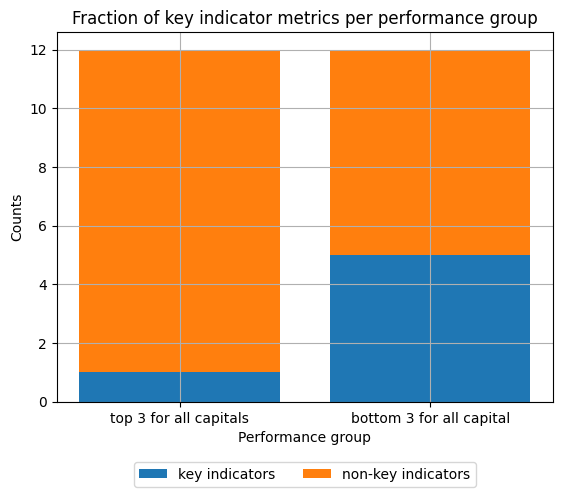

In [20]:
analysis.plot_nkey_per_group(best, worst)